In [1]:
%run ../../utils/commonImports.py
%matplotlib inline

In [2]:
data_root = "D:\\Dropbox\\My work\\krypl-project\\dataSplit\\01-priceMovement"
gs_path = "D:\\Dropbox\\My work\\krypl-project\\models\\01-priceMovement\\tree_search.pkl"

# Grid search evaluation

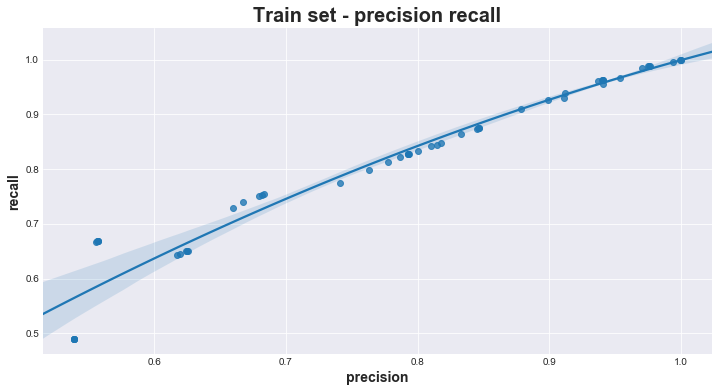

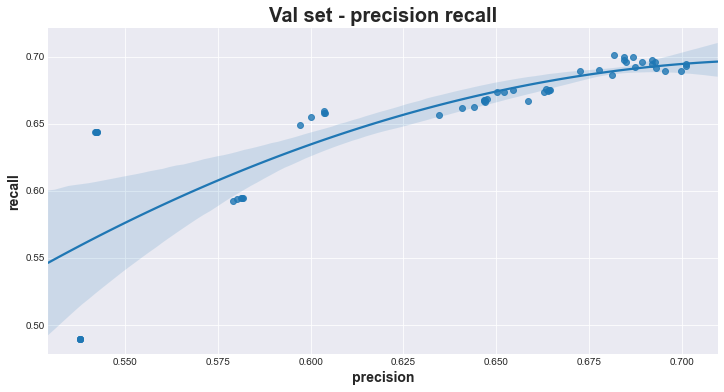

In [3]:
from utils.evaluation import gs_report

grid_search, stats_val = gs_report(data_root, gs_path)

# Model selection

In [4]:
stats_val.sort_values('precision', ascending=False).head(10)

,precision,recall,f1
50,0.7012,0.6944,0.6978
40,0.7012,0.6931,0.6971
45,0.6999,0.6892,0.6945
35,0.6955,0.6892,0.6924
30,0.6931,0.6912,0.6921
41,0.6930,0.6962,0.6946
51,0.6921,0.6947,0.6934
46,0.6920,0.6975,0.6947
36,0.6894,0.6961,0.6927
31,0.6874,0.6923,0.6899


In [6]:
from utils.evaluation import clf_report

clf = grid_search.clfs[50]
clf_report(clf, data_root)

## Train data

,predicted_0,predicted_1
true_0,37350,0
true_1,0,31939


Precision: 1.000
Recall: 1.000



## Validation data

,predicted_0,predicted_1
true_0,11795,4087
true_1,4222,9592


Precision: 0.701
Recall: 0.694



## Test data

,predicted_0,predicted_1
true_0,16998,6068
true_1,6001,13356


Precision: 0.688
Recall: 0.690

